## Mini Project | Supervised Learning and Ensembles
#### Submitted By: GROUP 5
---

**Team Members**

> **Sandeep Keswani**

> **Vivek V Krishnan**

> **Seeju Kumar** 

> **Shashank Shekhar**

----

### Case Study
**Campaign for selling personal loans**

This case is about a bank (**Thera Bank**) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly **to bring in more loan business** and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
**The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan.** This will increase the success ratio while at the same time reduce the cost of the campaign.
The file given below contains data on **5000 customers**. The data include customer demographic information (_age, income, etc._), the customer's relationship with the bank (_mortgage, securities account, etc._), and the **customer response to the last personal loan campaign (Personal Loan).** Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Data Set: **_Bank_Personal_Loan_Modelling-1.xlsx_**

#### Considering the information provided above, follow the steps given below:

    1. Read the column description and ensure you understand each attribute well. 
    2. Study the data distribution in each attribute, share your findings.
    3. Get the target column distribution. Your comments.
    4. Split the data into training and test set in the ratio of 70:30 respectively.
    5. Use a classification model to predict the likelihood of a liability customer buying personal loans. 
    6. Explain why you chose one model over the other (do not use ensemble techniques yet).
    7. Use ensemble techniques to improve the performance.

#### Please Note:

    - Total marks allotted for Mini Project is 50.
    - Only one person per group should make the submission for their group.
    - Please mention the group number and members on the first page of the submission.
    - Please submit working code and output (of each step) along with it in pdf,html and ipynb format. 
    - Please add necessary comments in all the files and make a managerial report based on that.
    - Name format of files should always be Group #_PGPBDA.B.AUG16_SLE_MiniPro.extension

#### Marks Distribution is as follows –

    1. Step 1 : Nil Points 
    2. Step 2 : 10 points 
    3. Step 3 : 5 points 
    4. Step 4 : 5 points 
    5. Step 5 : 10 points 
    6. Step 6 : 10 points 
    7. Step 7 : 10 points
    
----

In [5]:
#Import the required libraries 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

pd.set_option('display.notebook_repr_html', False)
plt.style.use('seaborn-white')

In [6]:
#column names of dataframe
df_columns = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']

In [13]:
#read the source file using panda 
df = pd.read_excel("data/Bank_Personal_Loan_Modelling-1.xlsx", sheet_name=1, names=df_columns)

In [14]:
#function to highlight ZEROs in the dataframe
def highlight_zeros(s):
    is_zero = s <= 0 
    return ['background-color: pink; color: red' if v else '' for v in is_zero]

In [66]:
#looking at some sample records from the dataframe
df.sample(15).style.apply(highlight_zeros)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
3571,42,18,153,93955,3,5.6,1,416,1,0,0,0,0
1424,29,3,92,94539,2,1.3,1,287,0,0,0,1,0
2682,53,27,81,90032,4,2.6,3,0,0,0,0,1,0
1232,43,19,84,92646,4,0.2,3,297,0,0,0,1,0
2305,32,7,185,92009,2,6.7,1,0,0,0,1,1,1
81,47,22,40,94612,3,2.7,2,0,0,0,0,1,0
2391,39,12,138,92697,1,4.66667,2,0,1,0,0,1,0
2222,45,20,41,95008,1,0.3,1,0,0,0,0,1,0
4678,33,7,115,93305,1,2.7,2,283,0,0,0,1,0
201,35,9,20,94609,2,1.4,3,0,0,0,0,1,1


In [67]:
#dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [28]:
#describe dataframe
df.describe().transpose().style.apply(highlight_zero)

,count,mean,std,min,25%,50%,75%,max
Age,5000,45.3384,11.4632,23,35,45,55,67
Experience,5000,20.1046,11.468,-3,10,20,30,43
Income,5000,73.7742,46.0337,8,39,64,98,224
ZIPCode,5000,93152.5,2121.85,9307,91911,93437,94608,96651
Family,5000,2.3964,1.14766,1,1,2,3,4
CCAvg,5000,1.93791,1.74767,0,0.7,1.5,2.5,10
Education,5000,1.881,0.839869,1,1,2,3,3
Mortgage,5000,56.4988,101.714,0,0,0,101,635
PersonalLoan,5000,0.096,0.294621,0,0,0,0,1
SecuritiesAccount,5000,0.1044,0.305809,0,0,0,0,1


> Looking at the dataframe description, we should remove the **ID** column

In [24]:
df = df.drop('ID', axis=1)

In [22]:
#check for any Null Value in the dataframe
df.isnull().any().sum()

0

In [71]:
#checking UNIQUE values in the dataframe to understand the data better
for col in df.columns:
    print(str(col) + " : "  + str(df.sort_values(by=[col])[col].unique()))
    print("---------------------------------------")

Age : [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
---------------------------------------
Experience : [-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
---------------------------------------
Income : [  8   9  10  11  12  13  14  15  18  19  20  21  22  23  24  25  28  29
  30  31  32  33  34  35  38  39  40  41  42  43  44  45  48  49  50  51
  52  53  54  55  58  59  60  61  62  63  64  65  68  69  70  71  72  73
  74  75  78  79  80  81  82  83  84  85  88  89  90  91  92  93  94  95
  98  99 100 101 102 103 104 105 108 109 110 111 112 113 114 115 118 119
 120 121 122 123 124 125 128 129 130 131 132 133 134 135 138 139 140 141
 142 143 144 145 148 149 150 151 152 153 154 155 158 159 160 161 162 163
 164 165 168 169 170 171 172 173 174 175 178 179 180 181 182 183 184 185
 188 189 190 191 192 193 1

##### How many records of account holder opted for the personal loan in the existing dataset?

In [72]:
p_loan_df = pd.DataFrame(df.PersonalLoan.value_counts() )

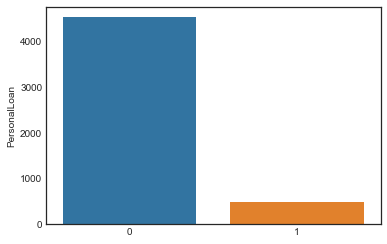

In [75]:
sns.barplot(p_loan_df.index, p_loan_df.PersonalLoan)

#### The summary statistics for SecuritiesAccount, CDAccount,  Online & CreditCard does not make sense, as they are categorical variables.